In [18]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date time
import seaborn as sns
from IPython.display import display

pd.options.display.max_rows = 100
plt.style.use('seaborn-v0_8-paper')

## Dataset Overview

### Acknowledgements
Fehring, Richard J., "Menstrual Cycle Data" (2012). Randomized Comparison of Two Internet-Supported Methods of Natural Family Planning. 7.
https://epublications.marquette.edu/data_nfp/7


### Content
The dataset is uploaded to Kaggle by the user Nikita Bisht. The dataset has 80 columns and is originally downloaded from https://epublications.marquette.edu/data_nfp/7/.

In [19]:
data = pd.read_csv("FedCycleData071012 (2).csv")
print(f"Data has {len(data.columns)} columns.")
data.columns

for c in data.columns:
    print(c, end=', ')

Data has 80 columns.
ClientID, CycleNumber, Group, CycleWithPeakorNot, ReproductiveCategory, LengthofCycle, MeanCycleLength, EstimatedDayofOvulation, LengthofLutealPhase, FirstDayofHigh, TotalNumberofHighDays, TotalHighPostPeak, TotalNumberofPeakDays, TotalDaysofFertility, TotalFertilityFormula, LengthofMenses, MeanMensesLength, MensesScoreDayOne, MensesScoreDayTwo, MensesScoreDayThree, MensesScoreDayFour, MensesScoreDayFive, MensesScoreDaySix, MensesScoreDaySeven, MensesScoreDayEight, MensesScoreDayNine, MensesScoreDayTen, MensesScoreDay11, MensesScoreDay12, MensesScoreDay13, MensesScoreDay14, MensesScoreDay15, TotalMensesScore, MeanBleedingIntensity, NumberofDaysofIntercourse, IntercourseInFertileWindow, UnusualBleeding, PhasesBleeding, IntercourseDuringUnusBleed, Age, AgeM, Maristatus, MaristatusM, Yearsmarried, Wedding, Religion, ReligionM, Ethnicity, EthnicityM, Schoolyears, SchoolyearsM, OccupationM, IncomeM, Height, Weight, Reprocate, Numberpreg, Livingkids, Miscarriages, Aborti

In [20]:
{col : data[col].unique() for col in data}

{'ClientID': array(['nfp8122', 'nfp8114', 'nfp8109', 'nfp8107', 'nfp8106', 'nfp8024',
        'nfp8020', 'nfp8026', 'nfp8030', 'nfp8031', 'nfp8032', 'nfp8034',
        'nfp8036', 'nfp8040', 'nfp8041', 'nfp8042', 'nfp8043', 'nfp8045',
        'nfp8046', 'nfp8047', 'nfp8049', 'nfp8050', 'nfp8051', 'nfp8057',
        'nfp8058', 'nfp8060', 'nfp8062', 'nfp8063', 'nfp8064', 'nfp8066',
        'nfp8068', 'nfp8069', 'nfp8072', 'nfp8073', 'nfp8074', 'nfp8076',
        'nfp8079', 'nfp8080', 'nfp8083', 'nfp8085', 'nfp8087', 'nfp8091',
        'nfp8094', 'nfp8099', 'nfp8100', 'nfp8101', 'nfp8102', 'nfp8110',
        'nfp8113', 'nfp8116', 'nfp8123', 'nfp8124', 'nfp8129', 'nfp8131',
        'nfp8133', 'nfp8137', 'nfp8140', 'nfp8143', 'nfp8144', 'nfp8149',
        'nfp8150', 'nfp8152', 'nfp8154', 'nfp8155', 'nfp8159', 'nfp8161',
        'nfp8164', 'nfp8165', 'nfp8168', 'nfp8172', 'nfp8173', 'nfp8174',
        'nfp8176', 'nfp8177', 'nfp8178', 'nfp8179', 'nfp8184', 'nfp8186',
        'nfp8187', 'nfp818

## Data preparation

There are some columns which values are unclear in meaning, and/or are irrelevant to the purpose of this study. Therefore, those columns are dropped.

In [21]:
data = data.drop(columns=['Group', 'CycleNumber', 'CycleWithPeakorNot', 'ReproductiveCategory', 'ReproductiveCategory', 
                   'TotalFertilityFormula', 'PhasesBleeding', 'IntercourseDuringUnusBleed', 
                   'Maristatus', 'MaristatusM', 'Wedding', 'Religion', 'ReligionM', 
                   'EthnicityM','SchoolyearsM', 
                   'OccupationM', 'IncomeM', 'Reprocate','Methoddate', 'Whychart', 
                   'Nextpreg','NextpregM', 'Spousesame', 'SpousesameM', 
                   'Medvitexplain','MedvitsM', 'MedvitexplainM', 'Gynosurgeries', 'LivingkidsM', 
                   'Livingkids','Boys', 'Girls', 'Urosurgeries', 'Breastfeeding', 
                   'Prevmethod', 'FirstDayofHigh','TotalNumberofHighDays',
                   'TotalHighPostPeak', 'TotalNumberofPeakDays', 'Timeattemptpreg',
                   'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
                   'EstimatedDayofOvulation', 'UnusualBleeding', 'AgeM', 'Yearsmarried', 'Schoolyears',
                   'LengthofLutealPhase','TotalDaysofFertility'])
print("Current number of columns: ", len(data.columns))
data.columns

Current number of columns:  32


Index(['ClientID', 'LengthofCycle', 'MeanCycleLength', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity', 'Age',
       'Ethnicity', 'Height', 'Weight', 'Numberpreg', 'Miscarriages',
       'Abortions', 'Medvits', 'Method', 'BMI'],
      dtype='object')

In [22]:
for c in data.columns:
    print(c, end=', ')

ClientID, LengthofCycle, MeanCycleLength, LengthofMenses, MeanMensesLength, MensesScoreDayOne, MensesScoreDayTwo, MensesScoreDayThree, MensesScoreDayFour, MensesScoreDayFive, MensesScoreDaySix, MensesScoreDaySeven, MensesScoreDayEight, MensesScoreDayNine, MensesScoreDayTen, MensesScoreDay11, MensesScoreDay12, MensesScoreDay13, MensesScoreDay14, MensesScoreDay15, TotalMensesScore, MeanBleedingIntensity, Age, Ethnicity, Height, Weight, Numberpreg, Miscarriages, Abortions, Medvits, Method, BMI, 

The dataset consists of a total of 1665 rows, which correspond to 159 unique client IDs. Each row represent the data recored in one menstrual cycle of the participants.

In [23]:
# Count number of rows
print(f"Data has {len(data)} rows.")

# count distinct value of "Id"
unique_id = len(pd.unique(data["ClientID"]))
  
print("Number of unique ClientIDs: " + str(unique_id))

display(data)

Data has 1665 rows.
Number of unique ClientIDs: 159


,ClientID,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,...,Age,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI
0,nfp8122,29,27.33,5,4.49,3,3,2,1,1,...,36,0,63,120,3,0,0,0,9,21.254724111867
1,nfp8122,27,,5,,3,3,2,1,1,...,,,,,,,,,,
2,nfp8122,29,,5,,3,3,2,1,1,...,,,,,,,,,,
3,nfp8122,27,,5,,3,3,3,2,1,...,,,,,,,,,,
4,nfp8122,28,,5,,3,3,2,2,1,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,29,,8,,2,3,3,2,2,...,,,,,,,,,,
1661,nfp8334,28,,6,,3,3,2,1,1,...,,,,,,,,,,
1662,nfp8334,28,,5,,3,2,2,1,1,...,,,,,,,,,,
1663,nfp8334,40,,6,,2,3,3,2,1,...,,,,,,,,,,


Empty numeric values in some column are represented as a blank space (" ") rather than None or NaN (not a number). Therefore, to make the data analysis simpler, the blank spaces are converted to NaN values.

For the 15 Menses Score columns, NaN values will be filled with 0s (for no bleeding) instead.

In [24]:
for col in data.columns:
    if col != 'ClientID':
        data[col] = pd.to_numeric(data[col], errors='coerce')

The client's personal information (Age, BMI, etc.) are only filled on the first line of each client's entries. To make the data analysis simpler, NaN values will be filled with the first value on the first row of the rows with the same clientID.

The mean values will not be filled since it can influence the results.

In [25]:
print("Before filling NaN values:")
data.head()

Before filling NaN values:


,ClientID,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,...,Age,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI
0,nfp8122,29,27.33,5.0,4.49,3.0,3.0,2.0,1.0,1.0,...,36.0,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724
1,nfp8122,27,NaN,5.0,NaN,3.0,3.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nfp8122,29,NaN,5.0,NaN,3.0,3.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nfp8122,27,NaN,5.0,NaN,3.0,3.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nfp8122,28,NaN,5.0,NaN,3.0,3.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def fillNaN(df):
    for column in df.columns:
        if "Mean" not in column:
            if "MensesScore" in column:
                df[column] = df.groupby('ClientID')[column].fillna(0)
            else: df[column] = df.groupby('ClientID')[column].transform(pd.Series.fillna, method='ffill')
    return df

data = fillNaN(data)
# print("After filling NaN values:")
# data.head()

In [27]:
# Assuming 'ClientID' is the column name for client IDs
# Assuming the data is sorted by 'ClientID' and 'MeanCycleLength'
data['MeanCycleLengthDifference'] = data.groupby('ClientID')['LengthofCycle'].diff()

# # Calculate the mean difference for each participant
mean_diff_per_participant = data.groupby('ClientID')['MeanCycleLengthDifference'].mean()

# # Display or use the result as needed
# print(mean_diff_per_participant)

In [28]:
data.head()

,ClientID,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,...,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI,MeanCycleLengthDifference
0,nfp8122,29,27.33,5.0,4.49,3.0,3.0,2.0,1.0,1.0,...,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,NaN
1,nfp8122,27,NaN,5.0,NaN,3.0,3.0,2.0,1.0,1.0,...,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,-2.0
2,nfp8122,29,NaN,5.0,NaN,3.0,3.0,2.0,1.0,1.0,...,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,2.0
3,nfp8122,27,NaN,5.0,NaN,3.0,3.0,3.0,2.0,1.0,...,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,-2.0
4,nfp8122,28,NaN,5.0,NaN,3.0,3.0,2.0,2.0,1.0,...,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,1.0


In [29]:
mean_diff_per_participant.head()

ClientID
nfp8020   -0.066667
nfp8024   -0.090909
nfp8026    1.000000
nfp8030   -0.066667
nfp8031    0.000000
Name: MeanCycleLengthDifference, dtype: float64

In [30]:
participants = data.drop(columns=['ClientID','LengthofCycle', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore'])
participants=participants.dropna(how='all')
participants.describe()

,MeanCycleLength,MeanMensesLength,MeanBleedingIntensity,Age,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI,MeanCycleLengthDifference
count,141.000000,141.000000,110.000000,1399.000000,1387.000000,1327.000000,1338.000000,1399.000000,1380.000000,1380.000000,1399.000000,1399.000000,1311.000000,1506.000000
mean,29.554255,5.263617,9.877000,31.915654,0.378515,65.091937,150.216741,2.887777,0.424638,0.028261,0.701930,8.128663,25.185363,-0.051129
std,3.048391,1.018652,2.556405,5.490533,1.193501,2.487796,33.177332,2.327816,0.790242,0.182437,0.457574,2.310770,5.074965,4.001085
min,24.000000,2.400000,3.330000,21.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.826657,-21.000000
25%,27.000000,4.540000,8.032500,28.000000,0.000000,63.000000,128.000000,0.000000,0.000000,0.000000,0.000000,9.000000,21.254724,-2.000000
50%,29.500000,5.160000,9.940000,32.000000,0.000000,65.000000,145.000000,3.000000,0.000000,0.000000,1.000000,9.000000,24.363579,0.000000
75%,31.170000,5.920000,11.500000,36.000000,0.000000,67.000000,170.000000,5.000000,1.000000,0.000000,1.000000,9.000000,27.891291,2.000000
max,40.000000,8.580000,18.330000,43.000000,5.000000,72.000000,300.000000,10.000000,4.000000,2.000000,1.000000,10.000000,49.917160,21.000000


In [31]:
dict_ethnicity = {0 : "Euro-American",
                  1 : "Asian-American",
                  2 : "Native-American",
                  3 : "Hispanic-American",
                  4 : "African American",
                  5 : "Other"}
participants['EthnicityMapped'] = participants['Ethnicity'].map(dict_ethnicity)
data['EthnicityMapped'] = data['Ethnicity'].map(dict_ethnicity)

In [32]:
dict_method = { 0 : "None",
                1 : "Pill",
                2 : "IUD",
                3 : "Injection",
                4 : "Barrier",
                5 : "Norplant",
                6 : "Breastfeeding",
                7 : "Withdrawal",
                8 : "Abstinence",
                9 : "NFP",
                10 : "Other"}
participants['MethodMapped'] = participants['Method'].map(dict_method)
data['MethodMapped'] = data['Method'].map(dict_method)

The participants can also be categorized into: 
- Age groups: Under 20, 20–24, 25–29, 30–34, 35–39, 40–44, 45–49, and Above 50 years
- BMI classes: underweight (BMI < 18.5 kg/m2), normal weight (18.5 ≤ BMI < 25 kg/m2), overweight (25 ≤ BMI < 30 kg/m2), and obese (BMI ≥ 30 kg/m2). The obese group was further divided into Class 1 (30 ≤ BMI < 35 kg/m2), 2 (35 ≤ BMI < 40 kg/m2), and 3 (BMI ≥ 40 kg/m2)

In [33]:
def categorize_by_age(df):
    df["AgeGroup"] = pd.cut(x=df['Age'], bins=[0,20,25,30,35,40,45,50,200], 
    labels=["Under 20","20-24","25-29","30-34","35-39","40-44","45-49","Above 50"])
    return df

data = categorize_by_age(data)
participants = categorize_by_age(participants)

In [34]:
def categorize_by_bmi(df):
    df["BMIClass"] = pd.cut(x=df['BMI'], bins=[0,18.5,24.9,29.9,34.9,39.9,40], 
    labels=["Underweight","Normal Weight","Overweight","Obesity Class I","Obesity Class II","Obesity Class III"])
    return df

data = categorize_by_bmi(data)
participants = categorize_by_bmi(participants)

display(participants)

,MeanCycleLength,MeanMensesLength,MeanBleedingIntensity,Age,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI,MeanCycleLengthDifference,EthnicityMapped,MethodMapped,AgeGroup,BMIClass
0,27.33,4.49,9.04,36.0,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,NaN,Euro-American,NFP,35-39,Normal Weight
1,NaN,NaN,NaN,36.0,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,-2.0,Euro-American,NFP,35-39,Normal Weight
2,NaN,NaN,NaN,36.0,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,2.0,Euro-American,NFP,35-39,Normal Weight
3,NaN,NaN,NaN,36.0,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,-2.0,Euro-American,NFP,35-39,Normal Weight
4,NaN,NaN,NaN,36.0,0.0,63.0,120.0,3.0,0.0,0.0,0.0,9.0,21.254724,1.0,Euro-American,NFP,35-39,Normal Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,NaN
1661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN


### Understanding the dataset

In order to understand the values presented in this dataset, some basic terminologies in menstrual health should be explained.

- **Menstrual Cycle**: The menstrual cycle is a natural, monthly process in women of reproductive age. It involves changes in the reproductive system, including the maturation of an egg, its release from the ovary (ovulation), and preparation of the uterus for a potential pregnancy. The typical menstrual cycle lasts about 28 days, but variations are common.

- **Menses**: Menses, or menstruation, refers to the shedding of the uterine lining if pregnancy does not occur. It is marked by the flow of blood and other materials from the uterus through the cervix and out of the body.

Then the function describe() is used to see general statistics of each column of the dataset.

In [35]:
data.describe()

,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,MensesScoreDaySix,...,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI,MeanCycleLengthDifference
count,1665.000000,141.000000,1665.000000,141.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,...,1387.000000,1327.000000,1338.000000,1399.000000,1380.000000,1380.000000,1399.000000,1399.000000,1311.000000,1506.000000
mean,29.299099,29.554255,5.239039,5.263617,2.284084,2.541141,2.009009,1.442643,0.917718,0.406006,...,0.378515,65.091937,150.216741,2.887777,0.424638,0.028261,0.701930,8.128663,25.185363,-0.051129
std,3.887932,3.048391,1.255005,1.018652,0.786235,0.612094,0.725093,0.718393,0.697578,0.586066,...,1.193501,2.487796,33.177332,2.327816,0.790242,0.182437,0.457574,2.310770,5.074965,4.001085
min,18.000000,24.000000,2.000000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.826657,-21.000000
25%,27.000000,27.000000,4.000000,4.540000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,63.000000,128.000000,0.000000,0.000000,0.000000,0.000000,9.000000,21.254724,-2.000000
50%,29.000000,29.500000,5.000000,5.160000,2.000000,3.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,65.000000,145.000000,3.000000,0.000000,0.000000,1.000000,9.000000,24.363579,0.000000
75%,31.000000,31.170000,6.000000,5.920000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,0.000000,67.000000,170.000000,5.000000,1.000000,0.000000,1.000000,9.000000,27.891291,2.000000
max,54.000000,40.000000,15.000000,8.580000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,5.000000,72.000000,300.000000,10.000000,4.000000,2.000000,1.000000,10.000000,49.917160,21.000000


In [36]:
participants.describe()

,MeanCycleLength,MeanMensesLength,MeanBleedingIntensity,Age,Ethnicity,Height,Weight,Numberpreg,Miscarriages,Abortions,Medvits,Method,BMI,MeanCycleLengthDifference
count,141.000000,141.000000,110.000000,1399.000000,1387.000000,1327.000000,1338.000000,1399.000000,1380.000000,1380.000000,1399.000000,1399.000000,1311.000000,1506.000000
mean,29.554255,5.263617,9.877000,31.915654,0.378515,65.091937,150.216741,2.887777,0.424638,0.028261,0.701930,8.128663,25.185363,-0.051129
std,3.048391,1.018652,2.556405,5.490533,1.193501,2.487796,33.177332,2.327816,0.790242,0.182437,0.457574,2.310770,5.074965,4.001085
min,24.000000,2.400000,3.330000,21.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.826657,-21.000000
25%,27.000000,4.540000,8.032500,28.000000,0.000000,63.000000,128.000000,0.000000,0.000000,0.000000,0.000000,9.000000,21.254724,-2.000000
50%,29.500000,5.160000,9.940000,32.000000,0.000000,65.000000,145.000000,3.000000,0.000000,0.000000,1.000000,9.000000,24.363579,0.000000
75%,31.170000,5.920000,11.500000,36.000000,0.000000,67.000000,170.000000,5.000000,1.000000,0.000000,1.000000,9.000000,27.891291,2.000000
max,40.000000,8.580000,18.330000,43.000000,5.000000,72.000000,300.000000,10.000000,4.000000,2.000000,1.000000,10.000000,49.917160,21.000000


In [37]:
participants['BMIClass'].describe()

count              1302
unique                5
top       Normal Weight
freq                705
Name: BMIClass, dtype: object

Text(0, 0.5, 'Count')

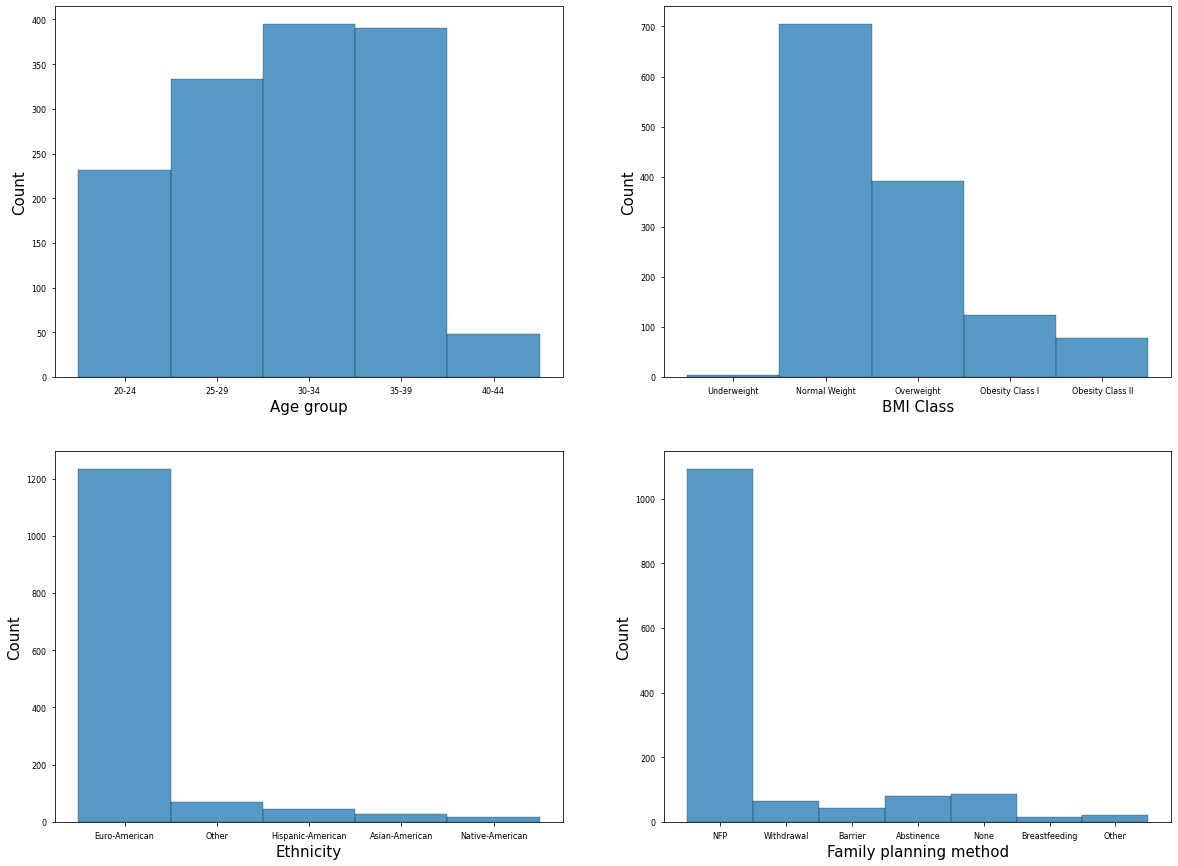

In [38]:
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.histplot(x=participants['AgeGroup'],stat='count')
plt.xlabel('Age group',fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.subplot(222)
sns.histplot(x=participants['BMIClass'],stat='count')
plt.xlabel('BMI Class',fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.subplot(223)
sns.histplot(x=participants['EthnicityMapped'],stat='count')
plt.xlabel('Ethnicity',fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.subplot(224)
sns.histplot(x=participants['MethodMapped'],stat='count')
plt.xlabel('Family planning method',fontsize=15)
plt.ylabel('Count', fontsize=15)

## Data Exploration

In [39]:
display(data)

,ClientID,LengthofCycle,MeanCycleLength,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,...,Miscarriages,Abortions,Medvits,Method,BMI,MeanCycleLengthDifference,EthnicityMapped,MethodMapped,AgeGroup,BMIClass
0,nfp8122,29,27.33,5.0,4.49,3.0,3.0,2.0,1.0,1.0,...,0.0,0.0,0.0,9.0,21.254724,NaN,Euro-American,NFP,35-39,Normal Weight
1,nfp8122,27,NaN,5.0,NaN,3.0,3.0,2.0,1.0,1.0,...,0.0,0.0,0.0,9.0,21.254724,-2.0,Euro-American,NFP,35-39,Normal Weight
2,nfp8122,29,NaN,5.0,NaN,3.0,3.0,2.0,1.0,1.0,...,0.0,0.0,0.0,9.0,21.254724,2.0,Euro-American,NFP,35-39,Normal Weight
3,nfp8122,27,NaN,5.0,NaN,3.0,3.0,3.0,2.0,1.0,...,0.0,0.0,0.0,9.0,21.254724,-2.0,Euro-American,NFP,35-39,Normal Weight
4,nfp8122,28,NaN,5.0,NaN,3.0,3.0,2.0,2.0,1.0,...,0.0,0.0,0.0,9.0,21.254724,1.0,Euro-American,NFP,35-39,Normal Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,29,NaN,8.0,NaN,2.0,3.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,NaN
1661,nfp8334,28,NaN,6.0,NaN,3.0,3.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
1662,nfp8334,28,NaN,5.0,NaN,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1663,nfp8334,40,NaN,6.0,NaN,2.0,3.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN


### Cycle length

Text(0, 0.5, 'Frequency')

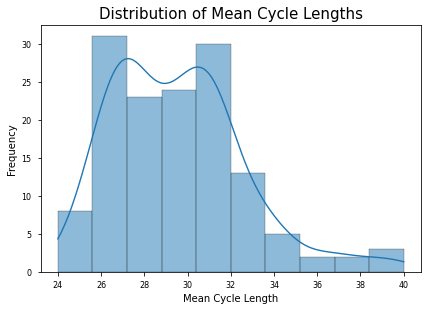

In [40]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.histplot(participants['MeanCycleLength'], kde=True)
plt.title('Distribution of Mean Cycle Lengths', fontsize=15)
plt.xlabel('Mean Cycle Length', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

In [41]:
data['LengthofCycle'].describe()

count    1665.000000
mean       29.299099
std         3.887932
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        54.000000
Name: LengthofCycle, dtype: float64

In [42]:
participants['MeanCycleLength'].describe()

count    141.000000
mean      29.554255
std        3.048391
min       24.000000
25%       27.000000
50%       29.500000
75%       31.170000
max       40.000000
Name: MeanCycleLength, dtype: float64

Text(0, 0.5, 'Mean cycle length')

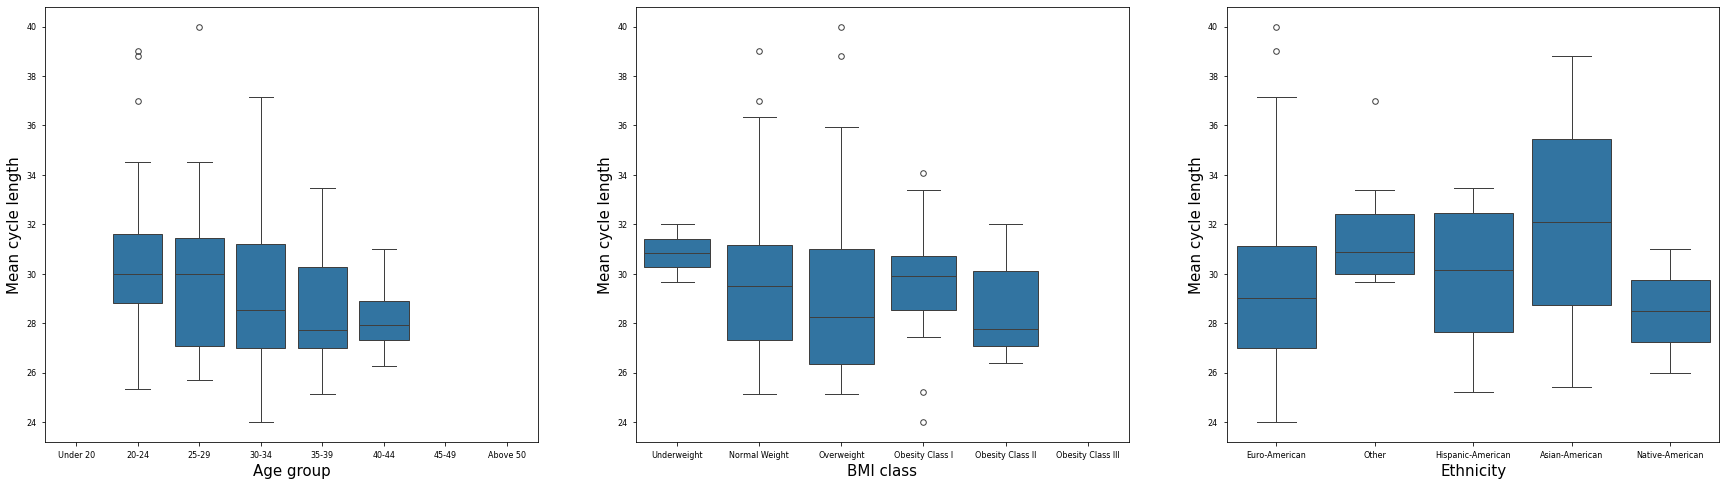

In [43]:
plt.figure(figsize=(30,8))

plt.subplot(131)
sns.boxplot(x=participants['AgeGroup'], y=participants['MeanCycleLength'])
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Mean cycle length', fontsize=15)

plt.subplot(132)
sns.boxplot(x=participants['BMIClass'], y=participants['MeanCycleLength'])
plt.xlabel('BMI class', fontsize=15)
plt.ylabel('Mean cycle length', fontsize=15)

plt.subplot(133)
sns.boxplot(x=participants['EthnicityMapped'], y=participants['MeanCycleLength'])
plt.xlabel('Ethnicity', fontsize=15)
plt.ylabel('Mean cycle length', fontsize=15)

Text(0, 0.5, 'Cycle length')

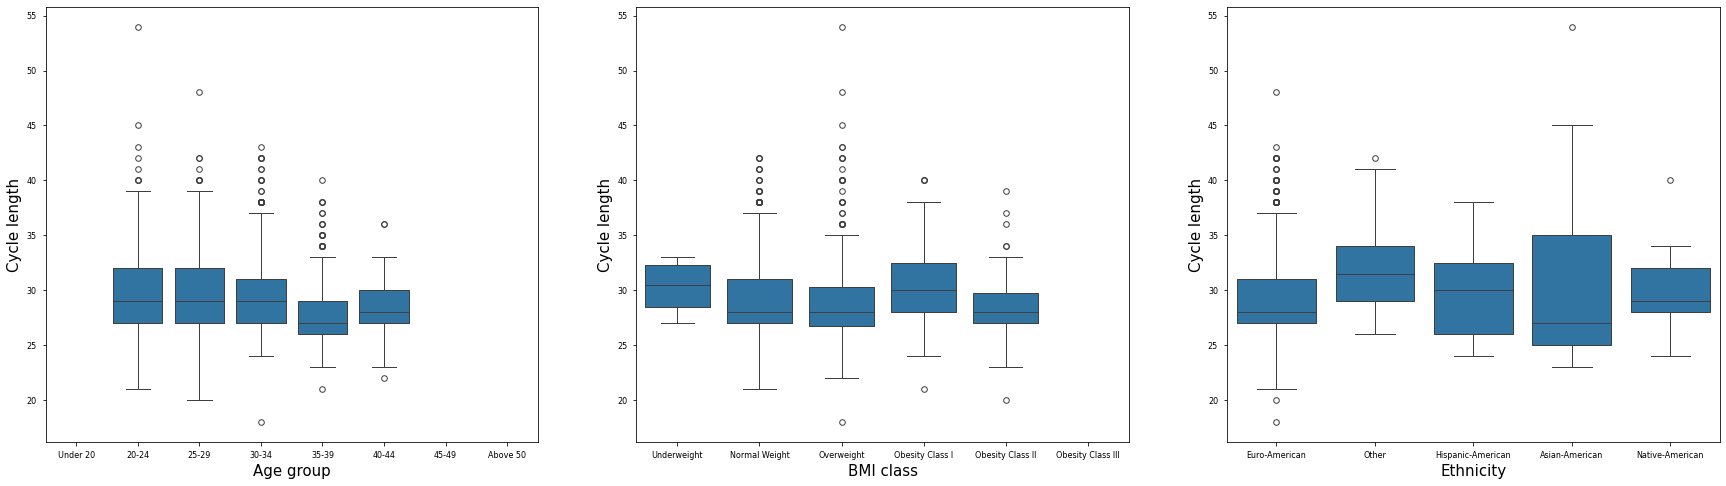

In [44]:
plt.figure(figsize=(30,8))

plt.subplot(131)
sns.boxplot(x=data['AgeGroup'], y=data['LengthofCycle'])
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Cycle length', fontsize=15)

plt.subplot(132)
sns.boxplot(x=data['BMIClass'], y=data['LengthofCycle'])
plt.xlabel('BMI class', fontsize=15)
plt.ylabel('Cycle length', fontsize=15)

plt.subplot(133)
sns.boxplot(x=data['EthnicityMapped'], y=data['LengthofCycle'])
plt.xlabel('Ethnicity', fontsize=15)
plt.ylabel('Cycle length', fontsize=15)

Text(0, 0.5, 'Mean cycle length')

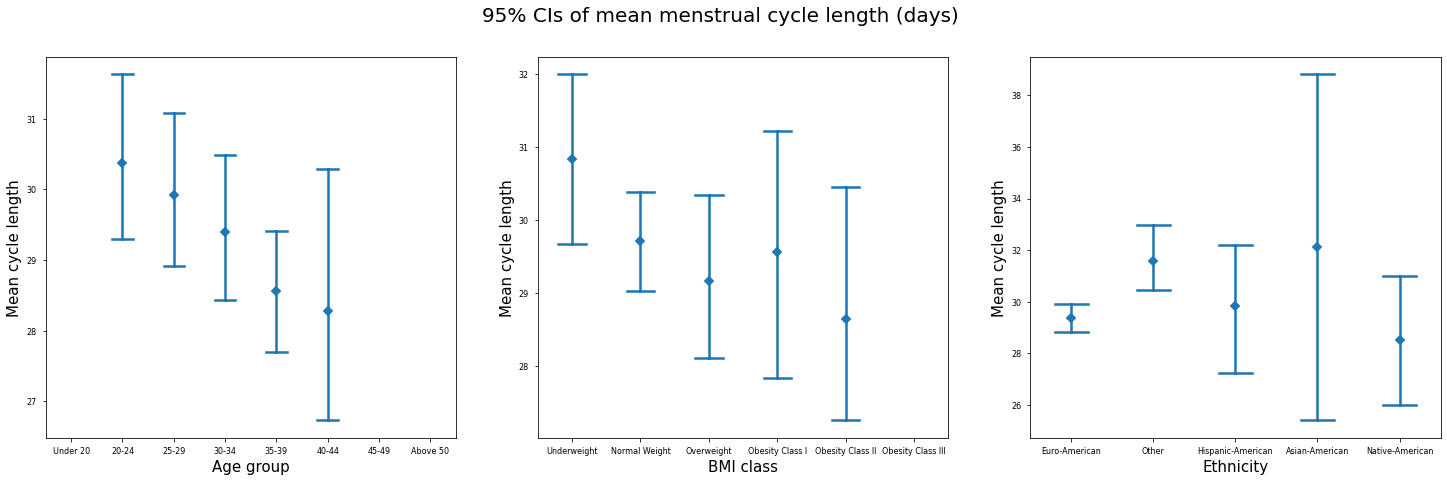

In [45]:
plt.figure(figsize=(25,7))
plt.suptitle('95% CIs of mean menstrual cycle length (days)', fontsize=20)

plt.subplot(131)
sns.pointplot(
    data=participants, x="AgeGroup", y="MeanCycleLength",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D"
)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Mean cycle length', fontsize=15)

plt.subplot(132)
sns.pointplot(
    data=participants, x="BMIClass", y="MeanCycleLength",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.xlabel('BMI class', fontsize=15)
plt.ylabel('Mean cycle length', fontsize=15)

plt.subplot(133)
sns.pointplot(
    data=participants, x="EthnicityMapped", y="MeanCycleLength",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.xlabel('Ethnicity', fontsize=15)
plt.ylabel('Mean cycle length', fontsize=15)

Text(0, 0.5, 'Cycle length')

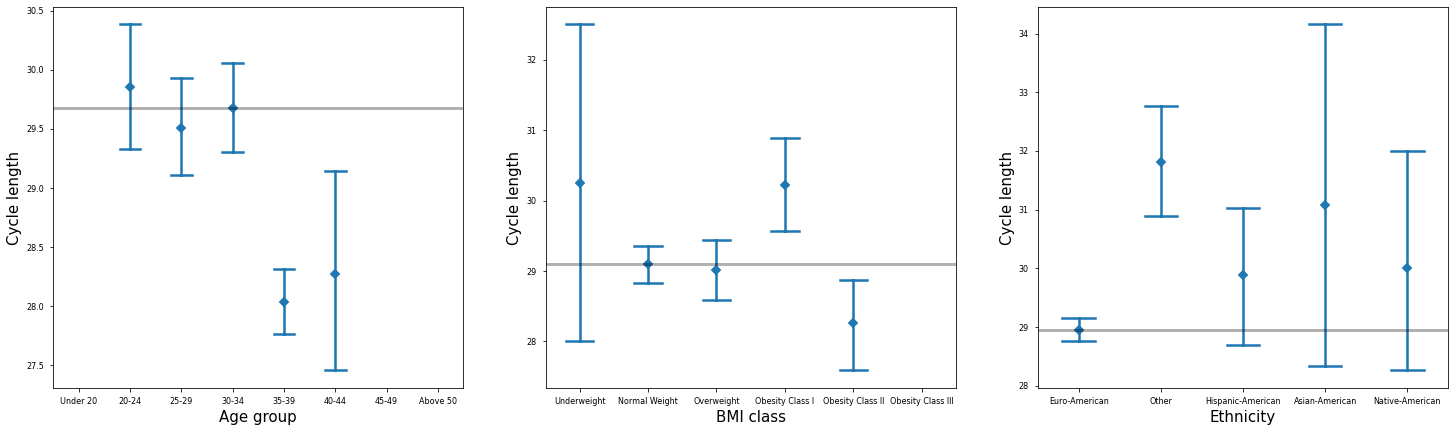

In [85]:
plt.figure(figsize=(25,7))
#plt.suptitle('95% CIs of mean menstrual cycle length (days)', fontsize=20)

plt.subplot(131)
sns.pointplot(
    data=data, x="AgeGroup", y="LengthofCycle",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D"
)
plt.axhline(y=29.674500000000002, c='k', alpha=0.3, lw=3)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Cycle length', fontsize=15)

plt.subplot(132)
sns.pointplot(
    data=data, x="BMIClass", y="LengthofCycle",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.axhline(y=29.1015, c='k', alpha=0.3, lw=3)
plt.xlabel('BMI class', fontsize=15)
plt.ylabel('Cycle length', fontsize=15)

plt.subplot(133)
sns.pointplot(
    data=data, x="EthnicityMapped", y="LengthofCycle",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.axhline(y=28.9555, c='k', alpha=0.3, lw=3)
plt.xlabel('Ethnicity', fontsize=15)
plt.ylabel('Cycle length', fontsize=15)

In [79]:
from scipy.stats import bootstrap
agegroups = ['20-24', '25-29', '30-34', '35-39','40-44']
ref = 29.674500000000002

for agegroup in agegroups:
    a = data.loc[data['AgeGroup']==agegroup]['LengthofCycle']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(agegroup, low, high, ref_dif))
    #print(agegroup, " & (",bootstrap_ci.confidence_interval.high,", ",bootstrap_ci.confidence_interval.low,") & ",bootstrap_ci.confidence_interval.high-bootstrap_ci.confidence_interval.low,"\\\\", sep="")

20-24 & 29.323, 30.422 & 0.198 \\
25-29 & 29.084, 29.931 & -0.167 \\
30-34 & 29.296, 30.053 & 0.000 \\
35-39 & 27.752, 28.330 & -1.634 \\
40-44 & 27.438, 29.125 & -1.393 \\


In [64]:
(29.296 + 30.053)/2

29.674500000000002

In [81]:
from scipy.stats import bootstrap
groups = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I','Obesity Class II']
ref = 29.1015

for group in groups:
    a = data.loc[data['BMIClass']==group]['LengthofCycle']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, ref_dif))

Underweight & 28.000, 32.500 & 1.148 \\
Normal Weight & 28.837, 29.366 & -0.000 \\
Overweight & 28.607, 29.434 & -0.081 \\
Obesity Class I & 29.553, 30.902 & 1.126 \\
Obesity Class II & 27.628, 28.910 & -0.832 \\


In [74]:
(28.837 + 29.366)/2

29.1015

In [82]:
from scipy.stats import bootstrap
groups = ['Euro-American', 'Other', 'Hispanic-American', 'Asian-American','Native-American']
ref = 28.9555

for group in groups:
    a = data.loc[data['EthnicityMapped']==group]['LengthofCycle']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, ref_dif))

Euro-American & 28.755, 29.156 & -0.000 \\
Other & 30.940, 32.721 & 2.875 \\
Hispanic-American & 28.744, 31.024 & 0.929 \\
Asian-American & 28.192, 34.231 & 2.256 \\
Native-American & 28.267, 32.000 & 1.178 \\


In [75]:
(28.755 + 29.156)/2

28.9555

In [53]:
data['MeanCycleLengthDifference'].describe()

count    1506.000000
mean       -0.051129
std         4.001085
min       -21.000000
25%        -2.000000
50%         0.000000
75%         2.000000
max        21.000000
Name: MeanCycleLengthDifference, dtype: float64

In [54]:
data['Irregular'] = data['MeanCycleLengthDifference'] >= 4

In [56]:
data['Irregular'].describe()

count      1665
unique        2
top       False
freq       1460
Name: Irregular, dtype: object

In [60]:
# Assuming 'AgeGroup' is the column name for age groups
# Assuming 'Irregular' is the column indicating irregular cycles
age_group_irregularity = data.groupby('AgeGroup')['Irregular'].mean() * 100
bmi_group_irregularity = data.groupby('BMIClass')['Irregular'].mean() * 100
ethnicity_group_irregularity = data.groupby('EthnicityMapped')['Irregular'].mean() * 100

# Display or use the result as needed
print(age_group_irregularity)

AgeGroup
Under 20          NaN
20-24       14.224138
25-29       14.414414
30-34       10.886076
35-39        7.672634
40-44       18.750000
45-49             NaN
Above 50          NaN
Name: Irregular, dtype: float64


In [61]:
# Displaying the result in a table
age_group_irregularity_table = pd.DataFrame(age_group_irregularity).reset_index()
age_group_irregularity_table.columns = ['AgeGroup', 'PercentageIrregular']
print(age_group_irregularity_table)

   AgeGroup  PercentageIrregular
0  Under 20                  NaN
1     20-24            14.224138
2     25-29            14.414414
3     30-34            10.886076
4     35-39             7.672634
5     40-44            18.750000
6     45-49                  NaN
7  Above 50                  NaN


In [62]:
# Displaying the result in a table
bmi_group_irregularity_table = pd.DataFrame(bmi_group_irregularity).reset_index()
bmi_group_irregularity_table.columns = ['BMIClass', 'PercentageIrregular']
print(bmi_group_irregularity_table)

            BMIClass  PercentageIrregular
0        Underweight            25.000000
1      Normal Weight            10.496454
2         Overweight            10.969388
3    Obesity Class I            13.821138
4   Obesity Class II            12.820513
5  Obesity Class III                  NaN


In [63]:
# Displaying the result in a table
ethnicity_group_irregularity_table = pd.DataFrame(ethnicity_group_irregularity).reset_index()
ethnicity_group_irregularity_table.columns = ['EthnicityMapped', 'PercentageIrregular']
print(ethnicity_group_irregularity_table)

     EthnicityMapped  PercentageIrregular
0     Asian-American            19.230769
1      Euro-American            11.174089
2  Hispanic-American             4.651163
3    Native-American            20.000000
4              Other            22.058824


In [86]:
import pandas as pd

# Assuming df is your DataFrame
# Assuming 'ClientID' and 'LengthofCycle' are the column names

# Calculate within-individual standard deviation
within_individual_std = data.groupby('ClientID')['LengthofCycle'].std()

# Display or use the result as needed
print(within_individual_std)


ClientID
nfp8020    2.729469
nfp8024    2.179449
nfp8026    2.065591
nfp8030    2.489980
nfp8031    1.029857
             ...   
nfp8322    5.648143
nfp8323    3.354384
nfp8324    8.663752
nfp8328    2.611527
nfp8334    3.956583
Name: LengthofCycle, Length: 159, dtype: float64


In [91]:
# Merge the standard deviations back into the original DataFrame
df = pd.merge(data, within_individual_std.rename('WithinIndividualStd'), left_on='ClientID', right_index=True)

# # Calculate the mean and standard error of the within-individual standard deviations within each age group
age_group_stats = df.groupby('AgeGroup')['WithinIndividualStd'].mean()
age_group_stats

AgeGroup
Under 20         NaN
20-24       2.769115
25-29       2.527724
30-34       2.398165
35-39       1.869399
40-44       2.379566
45-49            NaN
Above 50         NaN
Name: WithinIndividualStd, dtype: float64

In [102]:
from scipy.stats import bootstrap
agegroups = ['20-24', '25-29', '30-34', '35-39','40-44']
ref = 3.187

print("\\hline\n\\textit{Age group} & \\\\")

for agegroup in agegroups:
    a = data.loc[data['AgeGroup']==agegroup]['LengthofCycle']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanstd, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f} ({:.3f}, {:.3f}) \\\\".format(agegroup, (high+low)/2, low, high))

print("\\hline\n\\textit{BMI Class} & \\\\")
groups = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I','Obesity Class II']

for group in groups:
    a = data.loc[data['BMIClass']==group]['LengthofCycle']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanstd, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f} ({:.3f}, {:.3f}) \\\\".format(group, (high+low)/2, low, high))

groups = ['Euro-American', 'Other', 'Hispanic-American', 'Asian-American','Native-American']
ref = 28.9555

print("\\hline\n\\textit{Ethnicity} & \\\\")
for group in groups:
    a = data.loc[data['EthnicityMapped']==group]['LengthofCycle']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanstd, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f} ({:.3f}, {:.3f}) \\\\".format(group, (high+low)/2, low, high))

    

\hline
\textit{Age group} & \\
20-24 & 4.230 (3.526, 4.935) \\
25-29 & 3.907 (3.516, 4.298) \\
30-34 & 3.870 (3.532, 4.208) \\
35-39 & 2.924 (2.661, 3.187) \\
40-44 & 2.854 (2.184, 3.524) \\
\hline
\textit{BMI Class} & \\
Underweight & 1.603 (0.433, 2.773) \\
Normal Weight & 3.538 (3.308, 3.768) \\
Overweight & 4.159 (3.608, 4.710) \\
Obesity Class I & 3.761 (3.306, 4.216) \\
Obesity Class II & 2.915 (2.214, 3.615) \\
\hline
\textit{Ethnicity} & \\
Euro-American & 3.559 (3.359, 3.758) \\
Other & 3.609 (2.991, 4.226) \\
Hispanic-American & 3.757 (3.191, 4.323) \\
Asian-American & 7.579 (5.106, 10.052) \\
Native-American & 3.458 (1.857, 5.060) \\


### Menses length

Text(0, 0.5, 'Frequency')

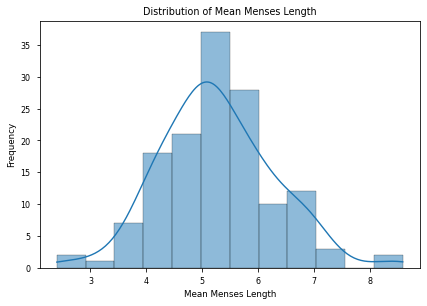

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.histplot(participants['MeanMensesLength'], kde=True)
plt.title('Distribution of Mean Menses Length')
plt.xlabel('Mean Menses Length')
plt.ylabel('Frequency')

In [32]:
participants['MeanMensesLength'].describe()

count    141.000000
mean       5.263617
std        1.018652
min        2.400000
25%        4.540000
50%        5.160000
75%        5.920000
max        8.580000
Name: MeanMensesLength, dtype: float64

In [33]:
data['LengthofMenses'].describe()

count    1665.000000
mean        5.239039
std         1.255005
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        15.000000
Name: LengthofMenses, dtype: float64

Text(0, 0.5, 'Menses length')

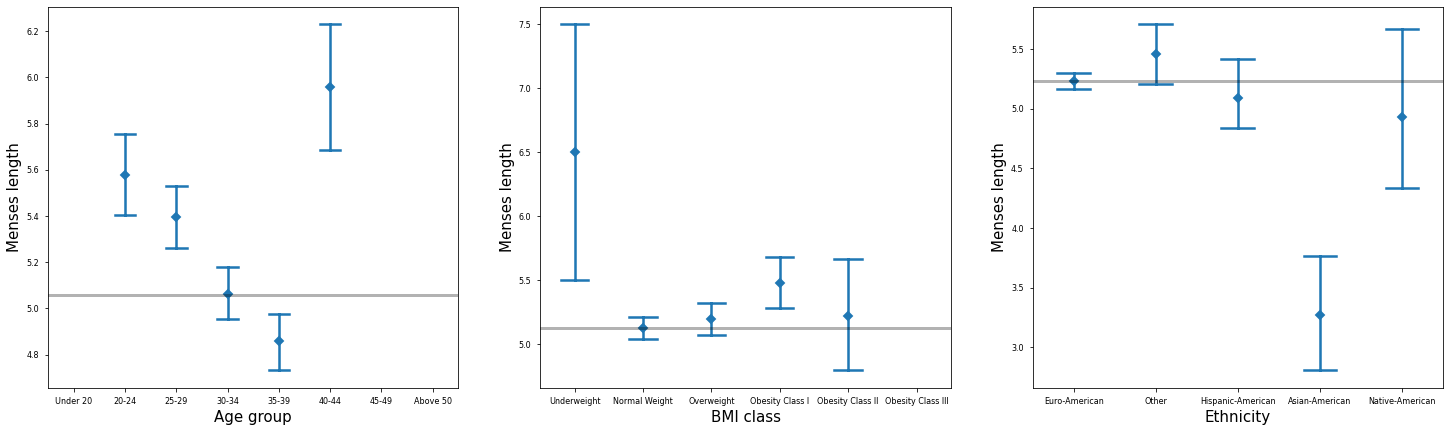

In [110]:
plt.figure(figsize=(25,7))
# plt.suptitle('95% CIs of mean menses length (days)', fontsize=20)

plt.subplot(131)
sns.pointplot(
    data=data, x="AgeGroup", y="LengthofMenses",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D"
)
plt.axhline(y=(4.947 + 5.172)/2, c='k', alpha=0.3, lw=3)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Menses length', fontsize=15)

plt.subplot(132)
sns.pointplot(
    data=data, x="BMIClass", y="LengthofMenses",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.axhline(y=(5.033 + 5.213)/2, c='k', alpha=0.3, lw=3)
plt.xlabel('BMI class', fontsize=15)
plt.ylabel('Menses length', fontsize=15)

plt.subplot(133)
sns.pointplot(
    data=data, x="EthnicityMapped", y="LengthofMenses",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.axhline(y=(5.161+ 5.302)/2, c='k', alpha=0.3, lw=3)
plt.xlabel('Ethnicity', fontsize=15)
plt.ylabel('Menses length', fontsize=15)

In [111]:
from scipy.stats import bootstrap
groups = ['20-24', '25-29', '30-34', '35-39','40-44']
ref = (4.947 + 5.172)/2

print("\\hline\n\\textit{Age group} & \\\\")

for group in groups:
    a = data.loc[data['AgeGroup']==group]['LengthofMenses']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, ref_dif))

print("\\hline\n\\textit{BMI Class} & \\\\")
groups = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I','Obesity Class II']
ref =(5.033 + 5.213)/2

for group in groups:
    a = data.loc[data['BMIClass']==group]['LengthofMenses']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, ref_dif))

groups = ['Euro-American', 'Other', 'Hispanic-American', 'Asian-American','Native-American']
ref = (5.161+ 5.302)/2

print("\\hline\n\\textit{Ethnicity} & \\\\")
for group in groups:
    a = data.loc[data['EthnicityMapped']==group]['LengthofMenses']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low
    ref_dif = ((high+low)/2) - ref

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, ref_dif))

    

\hline
\textit{Age group} & \\
20-24 & 5.409, 5.754 & 0.522 \\
25-29 & 5.258, 5.532 & 0.335 \\
30-34 & 4.947, 5.172 & -0.000 \\
35-39 & 4.739, 4.980 & -0.200 \\
40-44 & 5.646, 6.250 & 0.888 \\
\hline
\textit{BMI Class} & \\
Underweight & 5.500, 7.500 & 1.377 \\
Normal Weight & 5.033, 5.213 & -0.000 \\
Overweight & 5.077, 5.321 & 0.076 \\
Obesity Class I & 5.285, 5.675 & 0.357 \\
Obesity Class II & 4.795, 5.654 & 0.101 \\
\hline
\textit{Ethnicity} & \\
Euro-American & 5.161, 5.302 & 0.000 \\
Other & 5.206, 5.721 & 0.232 \\
Hispanic-American & 4.837, 5.395 & -0.115 \\
Asian-American & 2.808, 3.731 & -1.962 \\
Native-American & 4.267, 5.600 & -0.298 \\


In [35]:
groups = ['Euro-American', 'Other', 'Hispanic-American', 'Asian-American','Native-American']

for group in groups:
    a = data.loc[data['EthnicityMapped']==group]['LengthofMenses']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, high-low))

Euro-American & 5.161, 5.302 & 0.141 \\
Other & 5.206, 5.721 & 0.515 \\
Hispanic-American & 4.837, 5.395 & 0.558 \\
Asian-American & 2.808, 3.731 & 0.923 \\
Native-American & 4.267, 5.600 & 1.333 \\


In [36]:
groups = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I','Obesity Class II']

for group in groups:
    a = data.loc[data['BMIClass']==group]['LengthofMenses']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, high-low))

Underweight & 5.500, 7.500 & 2.000 \\
Normal Weight & 5.033, 5.213 & 0.180 \\
Overweight & 5.077, 5.321 & 0.245 \\
Obesity Class I & 5.285, 5.675 & 0.390 \\
Obesity Class II & 4.795, 5.654 & 0.859 \\


In [37]:
groups = ['20-24', '25-29', '30-34', '35-39','40-44']

for group in groups:
    a = data.loc[data['AgeGroup']==group]['LengthofMenses']
    a = (a,)
    #calculate 95% bootstrapped confidence interval for median
    bootstrap_ci = bootstrap(a, np.nanmean, confidence_level=0.95,
                            random_state=1, method='percentile')
    high = bootstrap_ci.confidence_interval.high
    low = bootstrap_ci.confidence_interval.low

    #view 95% boostrapped confidence interval
    print("{} & {:.3f}, {:.3f} & {:.3f} \\\\".format(group, low, high, high-low))

20-24 & 5.409, 5.754 & 0.345 \\
25-29 & 5.258, 5.532 & 0.273 \\
30-34 & 4.947, 5.172 & 0.225 \\
35-39 & 4.739, 4.980 & 0.241 \\
40-44 & 5.646, 6.250 & 0.604 \\


### Bleeding intensity

In [38]:
mensesScoreByDay = pd.DataFrame(data, columns=['MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine',
       'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12',
       'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15'])

for column in mensesScoreByDay.columns:
    mensesScoreByDay[column] = data[column].value_counts().sort_index()
mensesScoreByDay = mensesScoreByDay.fillna(0)
stacked_df = mensesScoreByDay.head(4).transpose()
dict_index = {'MensesScoreDayOne':'Day 1',
               'MensesScoreDayTwo':'Day 2',
               'MensesScoreDayThree':'Day 3',
               'MensesScoreDayFour':'Day 4',
               'MensesScoreDayFive':'Day 5',
               'MensesScoreDaySix':'Day 6',
               'MensesScoreDaySeven':'Day 7',
               'MensesScoreDayEight':'Day 8',
               'MensesScoreDayNine':'Day 9',
               'MensesScoreDayTen':'Day 10',
               'MensesScoreDay11':'Day 11',
               'MensesScoreDay12':'Day 12',
               'MensesScoreDay13':'Day 13',
               'MensesScoreDay14':'Day 14',
               'MensesScoreDay15':'Day 15'}
dict_intensity = {0:'No Bleeding',
                  1:'Light Bleeding',
                  2:'Medium Bleeding',
                  3:'Heavy Bleeding'}
stacked_df = stacked_df.rename(index=dict_index, columns=dict_intensity)
display(stacked_df)

,No Bleeding,Light Bleeding,Medium Bleeding,Heavy Bleeding
Day 1,4.0,333.0,514.0,814.0
Day 2,4.0,93.0,566.0,1002.0
Day 3,25.0,355.0,865.0,420.0
Day 4,87.0,891.0,550.0,137.0
Day 5,434.0,979.0,207.0,45.0
Day 6,1062.0,542.0,49.0,12.0
Day 7,1441.0,202.0,18.0,4.0
Day 8,1597.0,60.0,8.0,0.0
Day 9,1639.0,24.0,2.0,0.0
Day 10,1659.0,6.0,0.0,0.0


<Figure size 1080x1080 with 0 Axes>

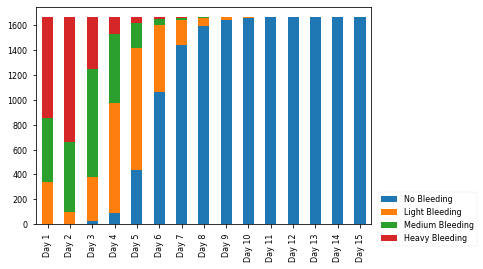

In [39]:
plt.figure(figsize=(15,15))
stacked_df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

Text(0, 0.5, 'Bleeding intensity')

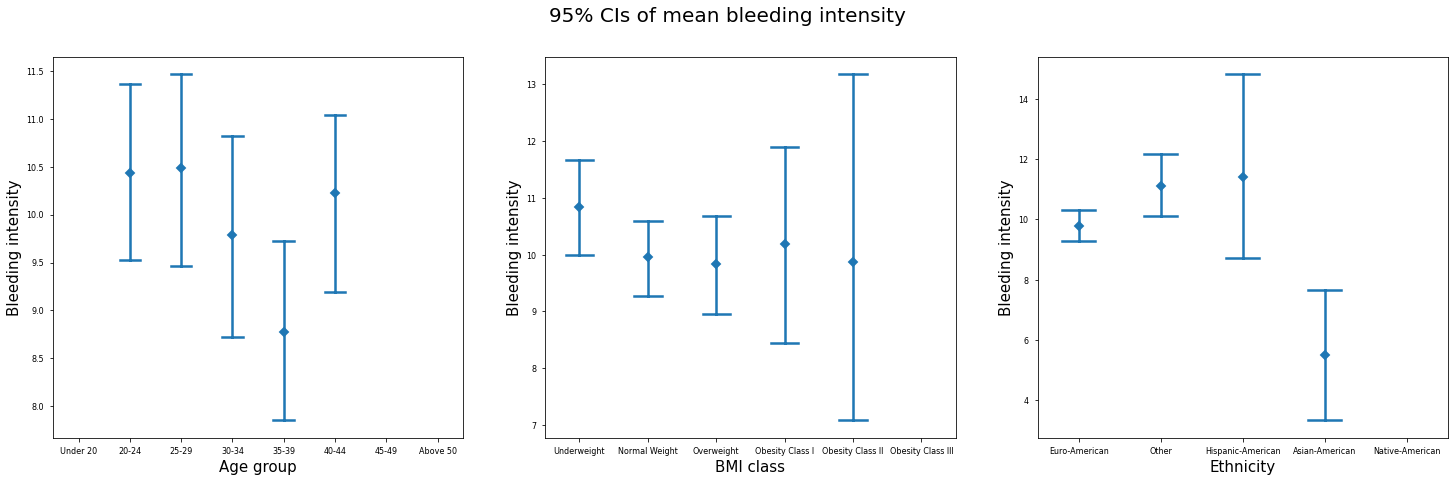

In [40]:
plt.figure(figsize=(25,7))
plt.suptitle('95% CIs of mean bleeding intensity', fontsize=20)

plt.subplot(131)
sns.pointplot(
    data=data, x="AgeGroup", y="MeanBleedingIntensity",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D"
)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Bleeding intensity', fontsize=15)

plt.subplot(132)
sns.pointplot(
    data=data, x="BMIClass", y="MeanBleedingIntensity",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.xlabel('BMI class', fontsize=15)
plt.ylabel('Bleeding intensity', fontsize=15)

plt.subplot(133)
sns.pointplot(
    data=data, x="EthnicityMapped", y="MeanBleedingIntensity",
    errorbar=("ci", 95), estimator='mean', capsize=.4,
    linestyle="none", marker="D",
)
plt.xlabel('Ethnicity', fontsize=15)
plt.ylabel('Bleeding intensity', fontsize=15)

In [41]:
participants['MeanBleedingIntensity'].describe()

count    110.000000
mean       9.877000
std        2.556405
min        3.330000
25%        8.032500
50%        9.940000
75%       11.500000
max       18.330000
Name: MeanBleedingIntensity, dtype: float64

### Others

<Axes: >

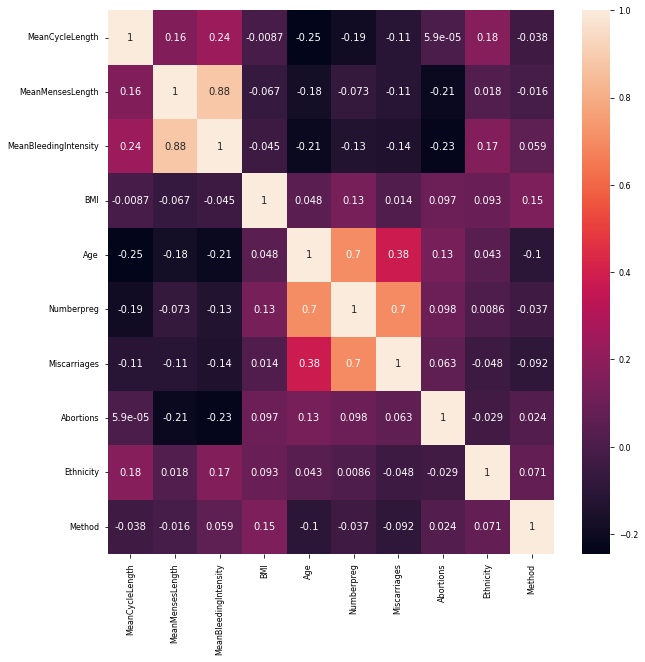

In [42]:
plt.figure(figsize=(10,10))
corr_df = pd.DataFrame(data, columns=['MeanCycleLength',
       'MeanMensesLength', 'MeanBleedingIntensity', 'BMI','Age', 'Numberpreg', 
       'Miscarriages', 'Abortions', 'Ethnicity', 'Method'])
corr = corr_df.corr()
sns.heatmap(corr, annot=True)

In [44]:
participants.columns

Index(['MeanCycleLength', 'MeanMensesLength', 'MeanBleedingIntensity', 'Age',
       'Ethnicity', 'Height', 'Weight', 'Numberpreg', 'Miscarriages',
       'Abortions', 'Medvits', 'Method', 'BMI', 'EthnicityMapped',
       'MethodMapped', 'AgeGroup', 'BMIClass'],
      dtype='object')

<Axes: >

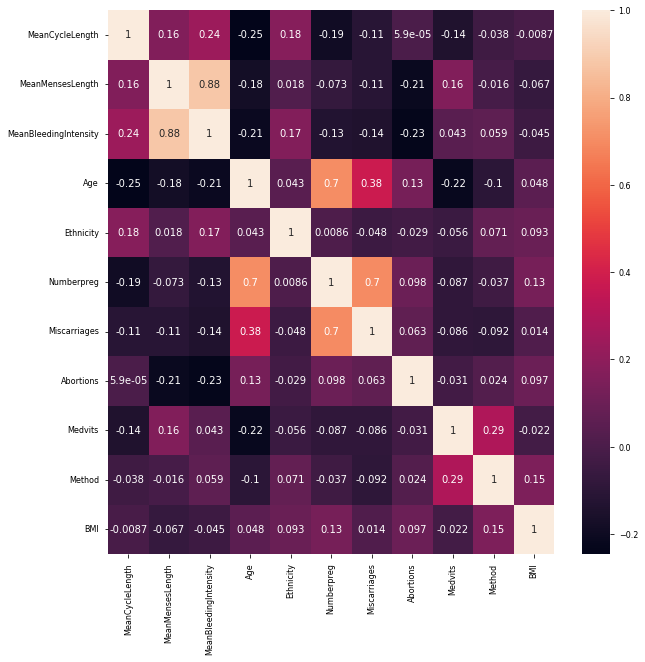

In [46]:
plt.figure(figsize=(10,10))
corr_df = pd.DataFrame(participants, columns=['MeanCycleLength', 'MeanMensesLength', 'MeanBleedingIntensity', 'Age',
       'Ethnicity', 'Numberpreg', 'Miscarriages',
       'Abortions', 'Medvits', 'Method', 'BMI'])
corr = corr_df.corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='MethodMapped', ylabel='MeanBleedingIntensity'>

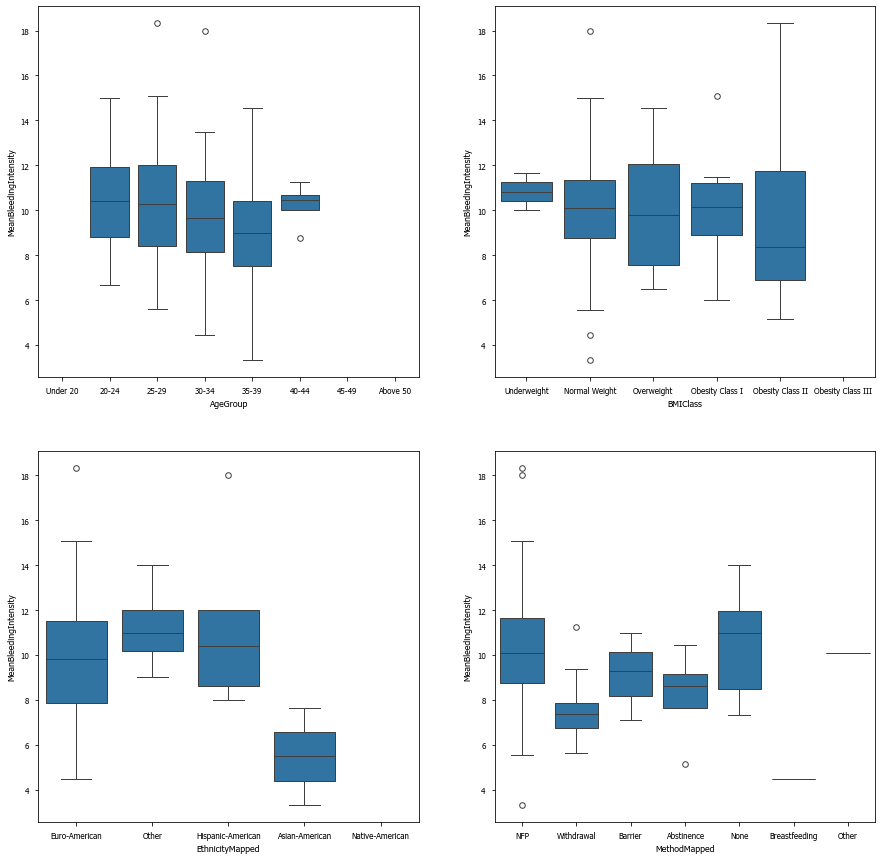

In [273]:
plt.figure(figsize=(15,15))

plt.subplot(221)
sns.boxplot(x=participants['AgeGroup'], y=participants['MeanBleedingIntensity'])

plt.subplot(222)
sns.boxplot(x=participants['BMIClass'], y=participants['MeanBleedingIntensity'])

plt.subplot(223)
sns.boxplot(x=participants['EthnicityMapped'], y=participants['MeanBleedingIntensity'])

plt.subplot(224)
sns.boxplot(x=participants['MethodMapped'], y=participants['MeanBleedingIntensity'])

<Axes: xlabel='MethodMapped', ylabel='MeanMensesLength'>

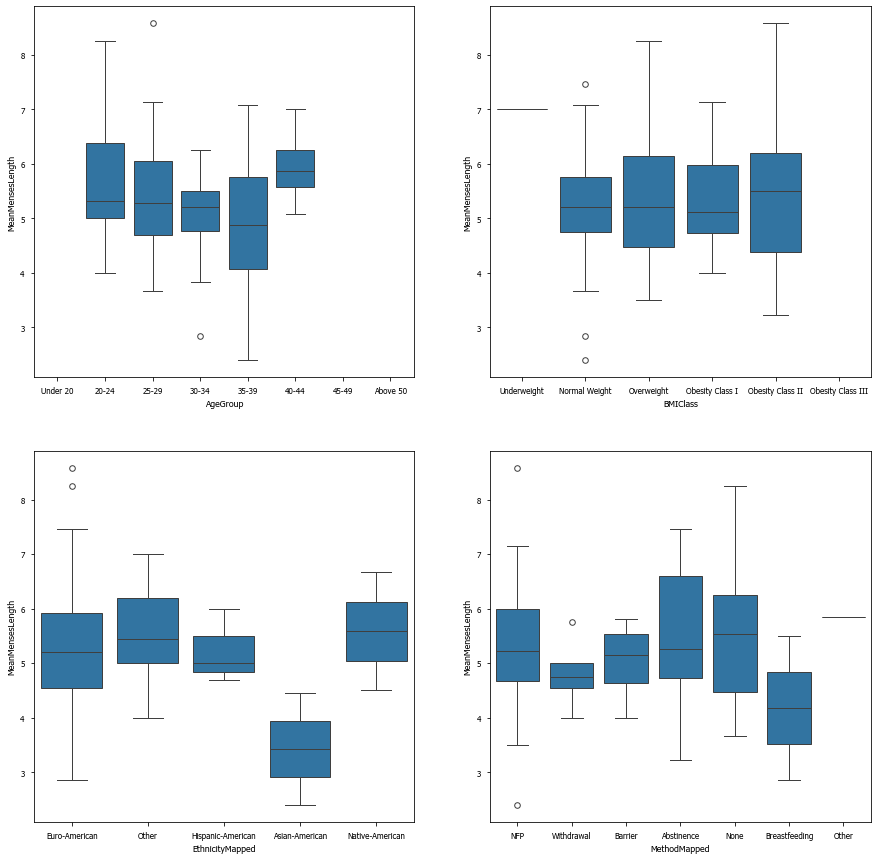

In [274]:
plt.figure(figsize=(15,15))

plt.subplot(221)
sns.boxplot(x=participants['AgeGroup'], y=participants['MeanMensesLength'])

plt.subplot(222)
sns.boxplot(x=participants['BMIClass'], y=participants['MeanMensesLength'])

plt.subplot(223)
sns.boxplot(x=participants['EthnicityMapped'], y=participants['MeanMensesLength'])

plt.subplot(224)
sns.boxplot(x=participants['MethodMapped'], y=participants['MeanMensesLength'])

<Axes: xlabel='MethodMapped', ylabel='MeanBleedingIntensity'>

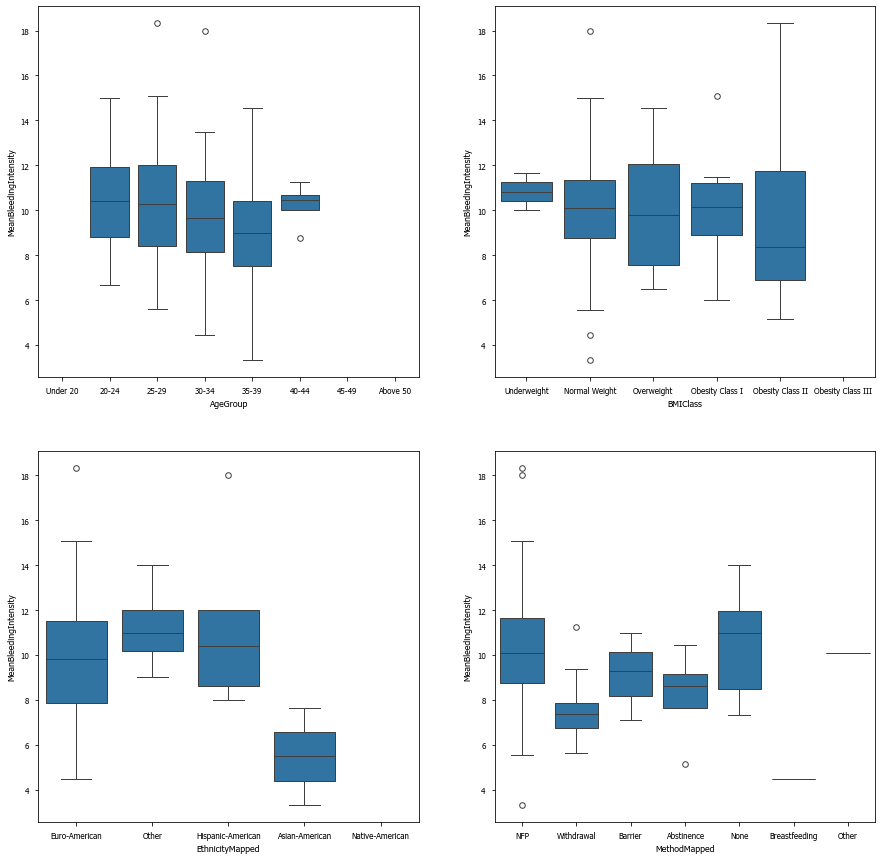

In [275]:
plt.figure(figsize=(15,15))

plt.subplot(221)
sns.boxplot(x=participants['AgeGroup'], y=participants['MeanBleedingIntensity'])

plt.subplot(222)
sns.boxplot(x=participants['BMIClass'], y=participants['MeanBleedingIntensity'])

plt.subplot(223)
sns.boxplot(x=participants['EthnicityMapped'], y=participants['MeanBleedingIntensity'])

plt.subplot(224)
sns.boxplot(x=participants['MethodMapped'], y=participants['MeanBleedingIntensity'])

<Axes: xlabel='BMIClass', ylabel='MeanBleedingIntensity'>

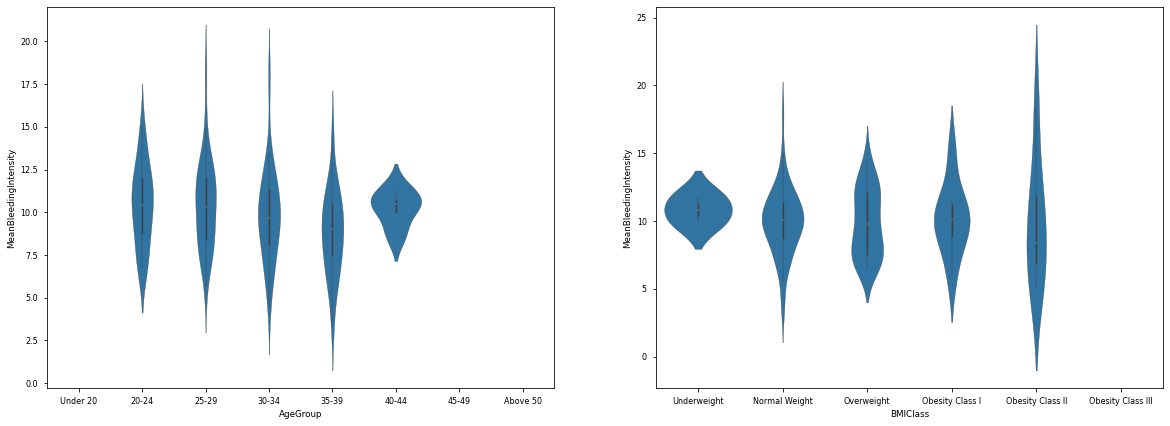

In [41]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sns.violinplot(data=data, x='AgeGroup', y='MeanBleedingIntensity')

plt.subplot(122)
sns.violinplot(data=data, x='BMIClass', y='MeanBleedingIntensity')